# cTakes vs Metamap Concept Extraction Comparison

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Reading in data

#### Metamap

In [38]:
metamap = pd.read_csv("/home/xc383@drexel.edu/text2graph/data/mtsamples/metamap/concepts/metamap_concepts.csv")
metamap["norm_file"] = metamap.file.apply(lambda x: x.split(".")[0])
print(metamap.shape)
metamap.head(3)

(1134892, 19)


,file,document_id,utterance_id,phrase_id,mapping_id,canidate_id,cui,start_pos,end_pos,document_offset,semantic_types,sources,score,matched,preferred,is_head,negated,file_name,norm_file
0,mtsamples-type-85-sample-1996.txt.json,0,0,0,0,0,C0370003,0,6,0,['sbst'],['SNOMEDCT_US'],-645,Specimen,Specimen,no,False,NaN,mtsamples-type-85-sample-1996
1,mtsamples-type-85-sample-1996.txt.json,0,0,0,0,1,C0332307,7,11,0,['qlco'],['SNOMEDCT_US'],-645,Type - attribute,Type - attribute,no,False,NaN,mtsamples-type-85-sample-1996
2,mtsamples-type-85-sample-1996.txt.json,0,0,0,0,2,C0037778,14,31,0,['bmod'],['SNOMEDCT_US'],-861,Medical speciality,Medical Specialities,yes,True,NaN,mtsamples-type-85-sample-1996


#### cTakes

In [39]:
ctakes = pd.read_csv("/home/xc383@drexel.edu/text2graph/data/mtsamples/ctakes/concepts_2021ab_snomedct_us/ctake_concepts.csv")
ctakes["norm_file"] = ctakes.file.apply(lambda x: "_".join(x.split(".")[0].split("_")[1:]))
ctakes = ctakes.rename(columns={"concept_cui": "cui", "concept_tui": "tui"})
ctakes.head(3)

,file,start,end,subject,polarity,uncertainty,confidence,conditional,generic,history,concept_scheme,cui,tui,concept_text,concept_score,concept_disambiguated,norm_file
0,despaced_mtsamples-type-42-sample-495.txt.xmi,68,71,patient,1,0,0.0,False,False,0,snomedct_us,C0036001,T116,S-Adenosylhomocysteine,0.0,False,mtsamples-type-42-sample-495
1,despaced_mtsamples-type-42-sample-495.txt.xmi,901,905,patient,-1,0,0.0,False,False,0,snomedct_us,C0013227,T121,Pharmaceutical Preparations,0.0,False,mtsamples-type-42-sample-495
2,despaced_mtsamples-type-42-sample-495.txt.xmi,906,910,patient,-1,0,0.0,False,False,0,snomedct_us,C0001962,T109,ethanol,0.0,False,mtsamples-type-42-sample-495


#### Semantic Types

In [40]:
import requests

semantic_group_types_url = "https://lhncbc.nlm.nih.gov/ii/tools/MetaMap/Docs/SemGroups_2018.txt"
semantic_group_types_columns = ["abbrev", "name", "tui", "type_name"]

response = requests.get(semantic_group_types_url)
semantic_groups = pd.DataFrame(map(lambda x: x.split("|"), response.text.split("\n")), columns=semantic_group_types_columns)
semantic_groups = semantic_groups.iloc[:-1,:]
semantic_groups.head()

,abbrev,name,tui,type_name
0,ACTI,Activities & Behaviors,T052,Activity
1,ACTI,Activities & Behaviors,T053,Behavior
2,ACTI,Activities & Behaviors,T056,Daily or Recreational Activity
3,ACTI,Activities & Behaviors,T051,Event
4,ACTI,Activities & Behaviors,T064,Governmental or Regulatory Activity


In [41]:
semantic_types_url = "https://lhncbc.nlm.nih.gov/ii/tools/MetaMap/Docs/SemanticTypes_2018AB.txt"
semantic_types_columns = ["abbrev", "tui", "name"]

response = requests.get(semantic_types_url)
semantic_types = pd.DataFrame(map(lambda x: x.split("|"), response.text.split("\n")), columns=semantic_types_columns)
semantic_types = semantic_types.iloc[:-1,:]
semantic_types.head()

,abbrev,tui,name
0,aapp,T116,"Amino Acid, Peptide, or Protein"
1,acab,T020,Acquired Abnormality
2,acty,T052,Activity
3,aggp,T100,Age Group
4,amas,T087,Amino Acid Sequence


In [42]:
semantic_map = pd.merge(semantic_groups, semantic_types, on="tui", suffixes=["_group", "_type"])
semantic_map.head()

,abbrev_group,name_group,tui,type_name,abbrev_type,name_type
0,ACTI,Activities & Behaviors,T052,Activity,acty,Activity
1,ACTI,Activities & Behaviors,T053,Behavior,bhvr,Behavior
2,ACTI,Activities & Behaviors,T056,Daily or Recreational Activity,dora,Daily or Recreational Activity
3,ACTI,Activities & Behaviors,T051,Event,evnt,Event
4,ACTI,Activities & Behaviors,T064,Governmental or Regulatory Activity,gora,Governmental or Regulatory Activity


In [43]:
semantic_map.loc[semantic_map.abbrev_type=="ocdi"]

,abbrev_group,name_group,tui,type_name,abbrev_type,name_type
100,OCCU,Occupations,T090,Occupation or Discipline,ocdi,Occupation or Discipline


In [44]:
semantic_map.value_counts(["abbrev_group", "name_group"])

abbrev_group  name_group                 
LIVB          Living Beings                  21
CHEM          Chemicals & Drugs              20
CONC          Concepts & Ideas               12
DISO          Disorders                      12
ANAT          Anatomy                        11
ACTI          Activities & Behaviors          9
PHYS          Physiology                      9
PROC          Procedures                      7
PHEN          Phenomena                       6
GENE          Genes & Molecular Sequences     5
OBJC          Objects                         5
ORGA          Organizations                   4
DEVI          Devices                         3
OCCU          Occupations                     2
GEOG          Geographic Areas                1
Name: count, dtype: int64

### Filter by Files

In [45]:
valid_files = set(metamap.norm_file.unique()).intersection(set(ctakes.norm_file.unique()))
metamap = metamap.loc[metamap.norm_file.isin(valid_files)]
ctakes = ctakes.loc[ctakes.norm_file.isin(valid_files)]

len(valid_files)

2871

## Analysis

### Typing Analysis

In [46]:
import re

def strlist_to_list(strlist: str) -> list:
    pattern = re.compile(r"\'(\w+)\'")
    return re.findall(pattern, strlist)

def map_upper(texts: list) -> str:
    upper_list = []

    for text in texts:
        upper_list.append(str(text).upper())
    return upper_list

All multi-types can be broken down into single groups.

In [47]:
meatmap_sems = list(map(strlist_to_list, metamap.semantic_types.unique()))
multi_meatmap_sems = list(filter(lambda x: len(x) > 1, meatmap_sems))

sems2 = []
for sems in multi_meatmap_sems:
    group = semantic_map.loc[semantic_map.abbrev_type.isin(['orch', 'phsu', 'vita']), "abbrev_group"].unique().tolist()
    sems2.append(
        (
            group,
            len(group),
            sems,
        )
    )

sems2

[(['CHEM'], 1, ['orch', 'phsu']),
 (['CHEM'], 1, ['hops', 'orch', 'phsu']),
 (['CHEM'], 1, ['aapp', 'bacs', 'phsu']),
 (['CHEM'], 1, ['elii', 'phsu']),
 (['CHEM'], 1, ['inch', 'phsu']),
 (['CHEM'], 1, ['hcro', 'mnob']),
 (['CHEM'], 1, ['orch', 'phsu', 'vita']),
 (['CHEM'], 1, ['aapp', 'imft']),
 (['CHEM'], 1, ['bodm', 'orch']),
 (['CHEM'], 1, ['aapp', 'enzy']),
 (['CHEM'], 1, ['bacs', 'orch', 'phsu']),
 (['CHEM'], 1, ['horm', 'orch', 'phsu']),
 (['CHEM'], 1, ['antb', 'orch']),
 (['CHEM'], 1, ['aapp', 'enzy', 'phsu']),
 (['CHEM'], 1, ['aapp', 'horm', 'phsu']),
 (['CHEM'], 1, ['nnon', 'phsu']),
 (['CHEM'], 1, ['elii', 'irda', 'phsu']),
 (['CHEM'], 1, ['bacs', 'orch']),
 (['CHEM'], 1, ['aapp', 'bacs']),
 (['CHEM'], 1, ['bacs', 'elii', 'phsu']),
 (['CHEM'], 1, ['bacs', 'elii']),
 (['CHEM'], 1, ['aapp', 'phsu']),
 (['CHEM'], 1, ['elii', 'hops']),
 (['CHEM'], 1, ['elii', 'irda']),
 (['CHEM'], 1, ['aapp', 'antb']),
 (['CHEM'], 1, ['mnob', 'orgt']),
 (['CHEM'], 1, ['aapp', 'enzy', 'imft']),
 (

In [48]:
abbrev_to_tui = {k:v for k, v in semantic_map.loc[:, ["abbrev_type", "tui"]].values.tolist()}
tui_to_group = {k:v for k, v in semantic_map.loc[:, ["tui", "abbrev_group"]].values.tolist()}

In [49]:
metamap["tui"] = metamap.semantic_types.apply(lambda x: strlist_to_list(x)[0]).map(abbrev_to_tui)
metamap["tgroup"] = metamap.tui.map(tui_to_group)
ctakes["tgroup"] = ctakes.tui.map(tui_to_group)

### Comparing CUI

In [50]:
ctakes_cui = set(ctakes.cui.unique())
metamap_cui = set(metamap.cui.unique())

print("There are %d unique CUI in ctakes." % len(ctakes_cui))
print("There are %d unique CUI in metamap." % len(metamap_cui))
print("There are %d unique CUI in both ctakes and metamap." % len(ctakes_cui.intersection(metamap_cui)))
print("There are %d unique ctakes CUI not in metamap." % len(ctakes_cui.difference(metamap_cui)))
print("There are %d unique metamap CUI not in ctakes." % len(metamap_cui.difference(ctakes_cui)))

There are 9793 unique CUI in ctakes.
There are 17488 unique CUI in metamap.
There are 8406 unique CUI in both ctakes and metamap.
There are 1387 unique ctakes CUI not in metamap.
There are 9082 unique metamap CUI not in ctakes.


In [51]:
merge_cols = ["norm_file", "cui"]

In [52]:
file_cui_counts = pd.merge(
    left=ctakes.value_counts(merge_cols),
    right=metamap.value_counts(merge_cols),
    on=merge_cols,
    suffixes=["_ctakes", "_metamap"]
)
file_cui_counts.head(3)

,,count_ctakes,count_metamap
norm_file,cui,,
mtsamples-type-99-sample-213,C0030193,56,33
mtsamples-type-86-sample-213,C0030193,56,33
mtsamples-type-90-sample-213,C0030193,56,33


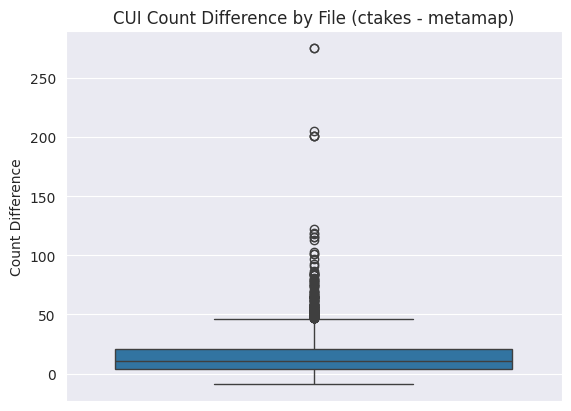

In [53]:
file_cui_counts["ctakes_minus_metamap"] = file_cui_counts.count_ctakes - file_cui_counts.count_metamap

diff_by_file = sns.boxplot(file_cui_counts.groupby("norm_file").ctakes_minus_metamap.sum().sort_values())
diff_by_file.set_title("CUI Count Difference by File (ctakes - metamap)")
diff_by_file.set_ylabel("Count Difference")

plt.show()

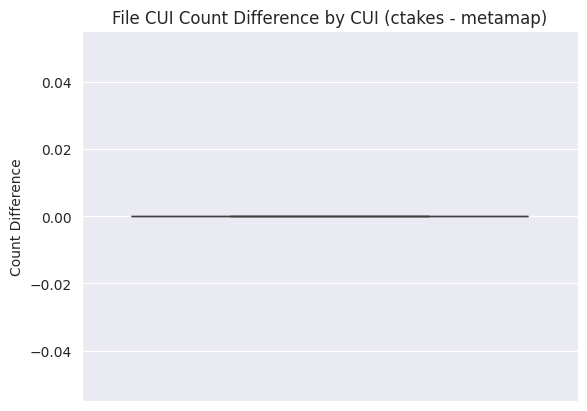

In [54]:
diff_by_file = sns.boxplot(file_cui_counts.groupby("cui").ctakes_minus_metamap.sum().sort_values(), showfliers=False)
diff_by_file.set_title("File CUI Count Difference by CUI (ctakes - metamap)")
diff_by_file.set_ylabel("Count Difference")

plt.show()

In [55]:
file_cui_counts.reset_index().loc[:, ["norm_file", "count_ctakes", "count_metamap"]].groupby("norm_file").sum().describe()

,count_ctakes,count_metamap
count,2871.000000,2871.000000
mean,82.964124,67.224312
std,62.555718,47.415127
min,1.000000,1.000000
25%,42.000000,35.000000
50%,70.000000,58.000000
75%,109.000000,87.000000
max,773.000000,572.000000


### Basic

In [56]:
text_path = "/home/xc383@drexel.edu/text2graph/data/mtsamples/despaced"
file_name = "mtsamples-type-100-sample-1019"
with open(text_path + "/despaced_" + file_name + ".txt", "r") as file:
    text = file.read()
print(text[:100])

Sample Type / Medical Specialty:  ENT - Otolaryngology
Sample Name: Endoscopic Sinus Surgery 
Descri


In [57]:
cpos = ctakes.loc[:, ["norm_file", "start", "end", "cui"]]
cpos.sort_values(["norm_file", "start"]).head(5)

,norm_file,start,end,cui
199793,mtsamples-type-100-sample-1019,34,37,C0150934
199794,mtsamples-type-100-sample-1019,40,54,C0150934
199756,mtsamples-type-100-sample-1019,68,78,C0014245
199795,mtsamples-type-100-sample-1019,79,84,C0030471
199757,mtsamples-type-100-sample-1019,85,92,C0543467


In [58]:
mpos = metamap.loc[:, ["norm_file", "start_pos", "end_pos", "document_offset", "document_id", "cui"]]
mpos["true_start"] = mpos.start_pos + mpos.document_offset + mpos.document_id
mpos["true_end"] = mpos.end_pos + mpos.document_offset + mpos.document_id
mpos.sort_values(["norm_file", "true_start"]).head(6)

,norm_file,start_pos,end_pos,document_offset,document_id,cui,true_start,true_end
806966,mtsamples-type-100-sample-1019,0,6,0,0,C0370003,0,6
806967,mtsamples-type-100-sample-1019,7,11,0,0,C0332307,7,11
806968,mtsamples-type-100-sample-1019,14,31,0,0,C0037778,14,31
806969,mtsamples-type-100-sample-1019,40,54,0,0,C0029892,40,54
806970,mtsamples-type-100-sample-1019,0,6,54,1,C0370003,55,61
806971,mtsamples-type-100-sample-1019,7,11,54,1,C1547383,62,66


In [59]:
file_cpos = cpos.loc[cpos.norm_file==file_name]
file_mpos = mpos.loc[mpos.norm_file==file_name]

In [60]:
pd.merge(file_cpos, file_mpos, left_on=["start", "end"], right_on=["true_start", "true_end"])

,norm_file_x,start,end,cui_x,norm_file_y,start_pos,end_pos,document_offset,document_id,cui_y,true_start,true_end
0,mtsamples-type-100-sample-1019,1905,1914,C0023660,mtsamples-type-100-sample-1019,200,209,1695,10,C0023660,1905,1914
1,mtsamples-type-100-sample-1019,1933,1944,C0014563,mtsamples-type-100-sample-1019,228,239,1695,10,C0014563,1933,1944
2,mtsamples-type-100-sample-1019,2688,2697,C0023660,mtsamples-type-100-sample-1019,51,60,2625,12,C0023660,2688,2697
3,mtsamples-type-100-sample-1019,2716,2727,C0014563,mtsamples-type-100-sample-1019,79,90,2625,12,C0014563,2716,2727
4,mtsamples-type-100-sample-1019,3416,3419,C3536832,mtsamples-type-100-sample-1019,35,38,3368,13,C0001861,3416,3419
...,...,...,...,...,...,...,...,...,...,...,...,...
130,mtsamples-type-100-sample-1019,4576,4585,C0024947,mtsamples-type-100-sample-1019,8,17,4553,15,C0024947,4576,4585
131,mtsamples-type-100-sample-1019,4745,4752,C0015027,mtsamples-type-100-sample-1019,177,184,4553,15,C0015027,4745,4752
132,mtsamples-type-100-sample-1019,4757,4762,C0007634,mtsamples-type-100-sample-1019,189,194,4553,15,C0007634,4757,4762
133,mtsamples-type-100-sample-1019,4946,4965,C0225434,mtsamples-type-100-sample-1019,378,397,4553,15,C0225434,4946,4965


# Expiriments

### Creating a Sample

In [61]:
import math
p = 0.5
z = 1.96
n = len(ctakes.norm_file.unique())
desired_margin_of_error = 0.05

sample_size = math.ceil((z ** 2 * p * (1 - p)) / (desired_margin_of_error ** 2))
print("Sample Size: %d" % sample_size)

Sample Size: 385


In [62]:
files = pd.DataFrame(ctakes.norm_file.unique(), columns=["norm_file"])
sample_files = files.sample(sample_size, random_state=101)

### Evaluate Concepts Extracted

In [63]:
sample_metamap = pd.merge(sample_files, metamap, on="norm_file")
sample_ctakes = pd.merge(sample_files, ctakes, on="norm_file")

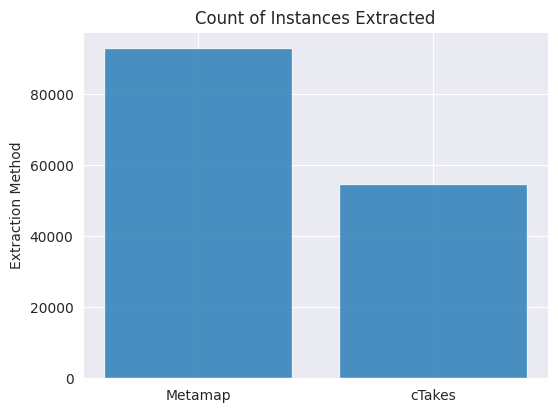

In [64]:
fig, ax = plt.subplots(figsize=(6, 4.5))

plt.bar(
    x=["Metamap", "cTakes"],
    height=[len(sample_metamap), len(sample_ctakes)],
    alpha=0.8
)

ax.set_title("Count of Instances Extracted")
ax.set_ylabel("Count")
ax.set_ylabel("Extraction Method")

plt.show()

In [65]:
file_cui_counts = pd.merge(
    left=sample_ctakes.value_counts(merge_cols),
    right=sample_metamap.value_counts(merge_cols),
    on=merge_cols,
    suffixes=["_ctakes", "_metamap"],
    how="outer"
)
file_cui_counts.head(3)

count_ctakes  count_metamap
norm_file                    cui                                  
mtsamples-type-90-sample-213 C0030193          56.0           33.0
                             C0817096          50.0            3.0
                             C0152244          37.0            NaN

In [66]:
file_cui_counts.describe()

,count_ctakes,count_metamap
count,28775.000000,57651.000000
mean,1.893797,1.608229
std,2.042907,1.469915
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,56.000000,47.000000


/tmp/ipykernel_3939206/1378868919.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cui_references_per_file.set_xticklabels(["cTakes", "Metamap"])


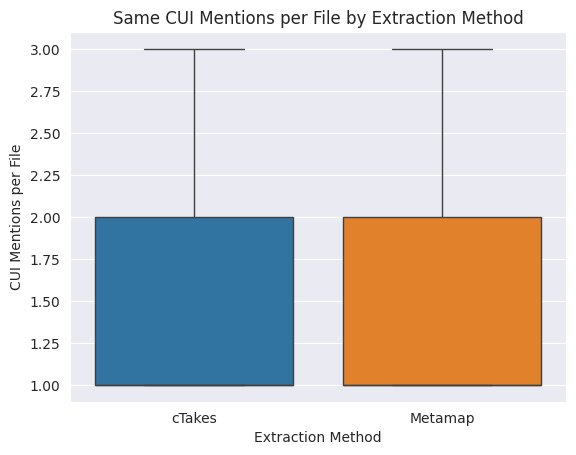

In [67]:
cui_references_per_file = sns.boxplot(file_cui_counts, showfliers=False)
cui_references_per_file.set_title("Same CUI Mentions per File by Extraction Method")
cui_references_per_file.set_ylabel("CUI Mentions per File")
cui_references_per_file.set_xlabel("Extraction Method")
cui_references_per_file.set_xticklabels(["cTakes", "Metamap"])
plt.show()

<Axes: >

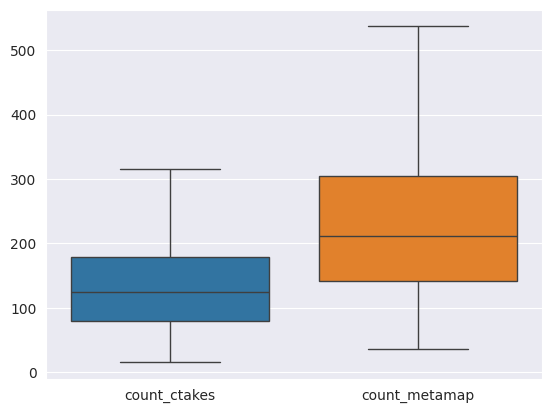

In [68]:
sns.boxplot(file_cui_counts.reset_index().loc[:, ["norm_file", "count_ctakes", "count_metamap"]].groupby("norm_file").sum(), showfliers=False)

In [69]:
calc_span_start = lambda x: x["start_pos"] + x["document_offset"] + x["document_id"]
calc_span_end = lambda x: x["end_pos"] + x["document_offset"] + x["document_id"]

sample_metamap["start"] = sample_metamap.apply(calc_span_start, axis=1)
sample_metamap["end"] = sample_metamap.apply(calc_span_end, axis=1)

sample_metamap.head(3)

,norm_file,file,document_id,utterance_id,phrase_id,mapping_id,canidate_id,cui,start_pos,end_pos,...,score,matched,preferred,is_head,negated,file_name,tui,tgroup,start,end
0,mtsamples-type-97-sample-2149,mtsamples-type-97-sample-2149.txt.json,0,0,0,0,0,C0370003,0,6,...,-645,Specimen,Specimen,no,False,NaN,T167,OBJC,0,6
1,mtsamples-type-97-sample-2149,mtsamples-type-97-sample-2149.txt.json,0,0,0,0,1,C0332307,7,11,...,-645,Type - attribute,Type - attribute,no,False,NaN,T080,CONC,7,11
2,mtsamples-type-97-sample-2149,mtsamples-type-97-sample-2149.txt.json,0,0,0,0,2,C0037778,14,31,...,-861,Medical speciality,Medical Specialities,yes,True,NaN,T091,OCCU,14,31


In [70]:
base_scpos = sample_ctakes.loc[:, ["norm_file", "cui",  "tgroup", "tui", "start", "end"]]
scpos = base_scpos.reset_index().rename({"index": "id"}, axis=1)
scpos["id"] = scpos.id.apply(lambda x: "c" + str(x))

base_smpos = sample_metamap.loc[:, ["norm_file", "cui", "tgroup", "tui", "start", "end"]]
smpos = base_smpos.reset_index().rename({"index": "id"}, axis=1)
smpos["id"] = smpos.id.apply(lambda x: "m" + str(x))

matches = pd.merge(smpos, scpos, on=["norm_file", "start", "end"], suffixes=["_metamap", "_ctakes"], how="outer")

In [71]:
import numpy as np
all_tgroup_cnts = matches.replace(np.nan, None).apply(lambda x: x["tgroup_metamap"] if x["tgroup_metamap"] is not None else x["tgroup_ctakes"], axis=1).value_counts()
exact_match_tgroup_cnts = matches.loc[matches.cui_metamap == matches.cui_ctakes, "tgroup_ctakes"].rename("tui").value_counts()

### Comparing Semantic Typings

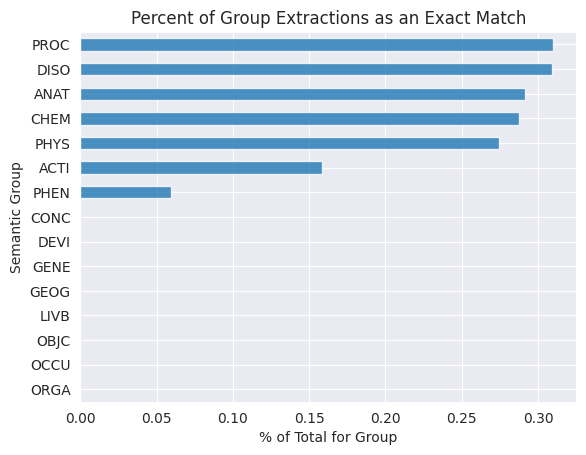

In [72]:
fig, ax = plt.subplots()

(exact_match_tgroup_cnts / all_tgroup_cnts).sort_values(ascending=False)[::-1].plot.barh(title="Percent of Group Extractions as an Exact Match", xlabel="% of Total for Group", ylabel="Semantic Group", alpha=0.8)
plt.show()

In [74]:
import numpy as np
all_tui_cnts = matches.replace(np.nan, None).apply(lambda x: x["tui_metamap"] if x["tui_metamap"] is not None else x["tui_ctakes"], axis=1).value_counts()
exact_match_tui_cnts = matches.loc[matches.cui_metamap == matches.cui_ctakes, "tui_ctakes"].rename("tui").value_counts()

The number of TUIs found in exact matches over all concepts: 45/110 (40.91%)


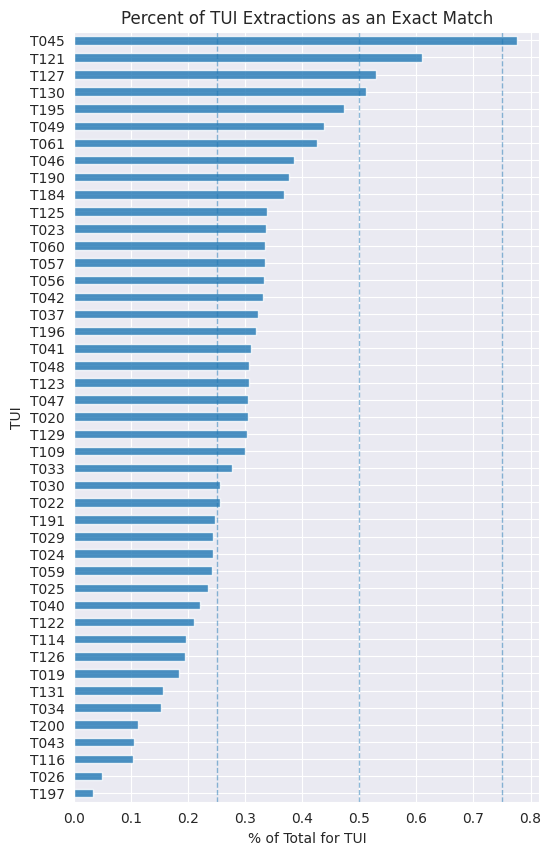

In [75]:
fig, ax = plt.subplots(figsize=(6, 10))

plt.axvline(x=0.25, linewidth=1, linestyle="--", alpha=0.5, label="25%")
plt.axvline(x=0.5, linewidth=1, linestyle="--", alpha=0.5, label="50%")
plt.axvline(x=0.75, linewidth=1, linestyle="--", alpha=0.5, label="75%")

tmp = (exact_match_tui_cnts / all_tui_cnts)
tmp = tmp.loc[~tmp.isnull()]
tmp.sort_values(ascending=False)[::-1].plot.barh(title="Percent of TUI Extractions as an Exact Match", xlabel="% of Total for TUI", ylabel="TUI", alpha=0.8)

print("The number of TUIs found in exact matches over all concepts: %d/%d (%.2f%%)" % (len(tmp), len(all_tui_cnts), len(tmp) / len(all_tui_cnts) * 100))
plt.show()

In [76]:
metamap_tgroups = matches.tgroup_metamap.value_counts().rename("metamap").fillna(0) / matches.tgroup_metamap.value_counts().sum()
ctakes_tgroups = matches.tgroup_ctakes.value_counts().rename("ctakes").fillna(0) / matches.tgroup_ctakes.value_counts().sum()

groups = metamap_tgroups.to_frame().join(ctakes_tgroups).fillna(0).sort_index()

In [77]:
len(groups[groups.ctakes==0].index), ", ".join(groups[groups.ctakes==0].index)

(8, 'CONC, DEVI, GENE, GEOG, LIVB, OBJC, OCCU, ORGA')

In [78]:
semantic_map

,abbrev_group,name_group,tui,type_name,abbrev_type,name_type
0,ACTI,Activities & Behaviors,T052,Activity,acty,Activity
1,ACTI,Activities & Behaviors,T053,Behavior,bhvr,Behavior
2,ACTI,Activities & Behaviors,T056,Daily or Recreational Activity,dora,Daily or Recreational Activity
3,ACTI,Activities & Behaviors,T051,Event,evnt,Event
4,ACTI,Activities & Behaviors,T064,Governmental or Regulatory Activity,gora,Governmental or Regulatory Activity
...,...,...,...,...,...,...
122,PROC,Procedures,T058,Health Care Activity,hlca,Health Care Activity
123,PROC,Procedures,T059,Laboratory Procedure,lbpr,Laboratory Procedure
124,PROC,Procedures,T063,Molecular Biology Research Technique,mbrt,Molecular Biology Research Technique
125,PROC,Procedures,T062,Research Activity,resa,Research Activity


In [79]:
abbrv_to_name = {k:v for k, v in semantic_map.loc[:, ["abbrev_group", "name_group"]].drop_duplicates().values.tolist()}

In [80]:
tmp = groups.apply(lambda x: round(x, 4))
tmp = tmp.reset_index()
tmp["group_name"] = tmp.tgroup_metamap.map(abbrv_to_name)
tmp

,tgroup_metamap,metamap,ctakes,group_name
0,ACTI,0.0126,0.0083,Activities & Behaviors
1,ANAT,0.1097,0.3132,Anatomy
2,CHEM,0.0390,0.0648,Chemicals & Drugs
3,CONC,0.4088,0.0000,Concepts & Ideas
4,DEVI,0.0290,0.0000,Devices
5,DISO,0.1742,0.3930,Disorders
6,GENE,0.0001,0.0000,Genes & Molecular Sequences
7,GEOG,0.0034,0.0000,Geographic Areas
8,LIVB,0.0314,0.0000,Living Beings
9,OBJC,0.0299,0.0000,Objects


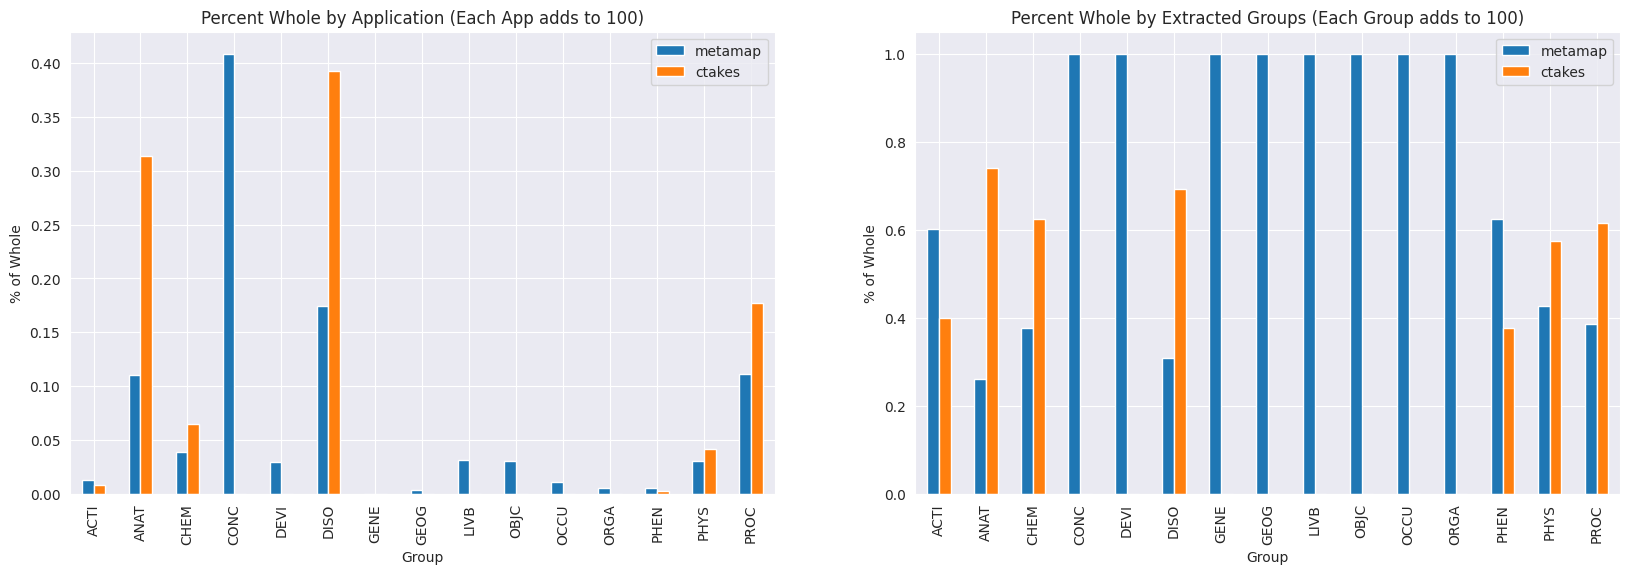

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

groups.plot.bar(
    title="Percent Whole by Application (Each App adds to 100)",
    ylabel="% of Whole",
    xlabel="Group",
    ax=ax[0]
)

(groups.metamap/(groups.metamap + groups.ctakes)).rename("metamap").to_frame().join((groups.ctakes/(groups.metamap + groups.ctakes)).rename("ctakes")).plot.bar(
    title="Percent Whole by Extracted Groups (Each Group adds to 100)",
    ylabel="% of Whole",
    xlabel="Group",
    ax=ax[1]
)

plt.show()

Metamap collects more groups than cTakes so the graphic depics this. It is not showing how the apps perform on same topics. Below shows this

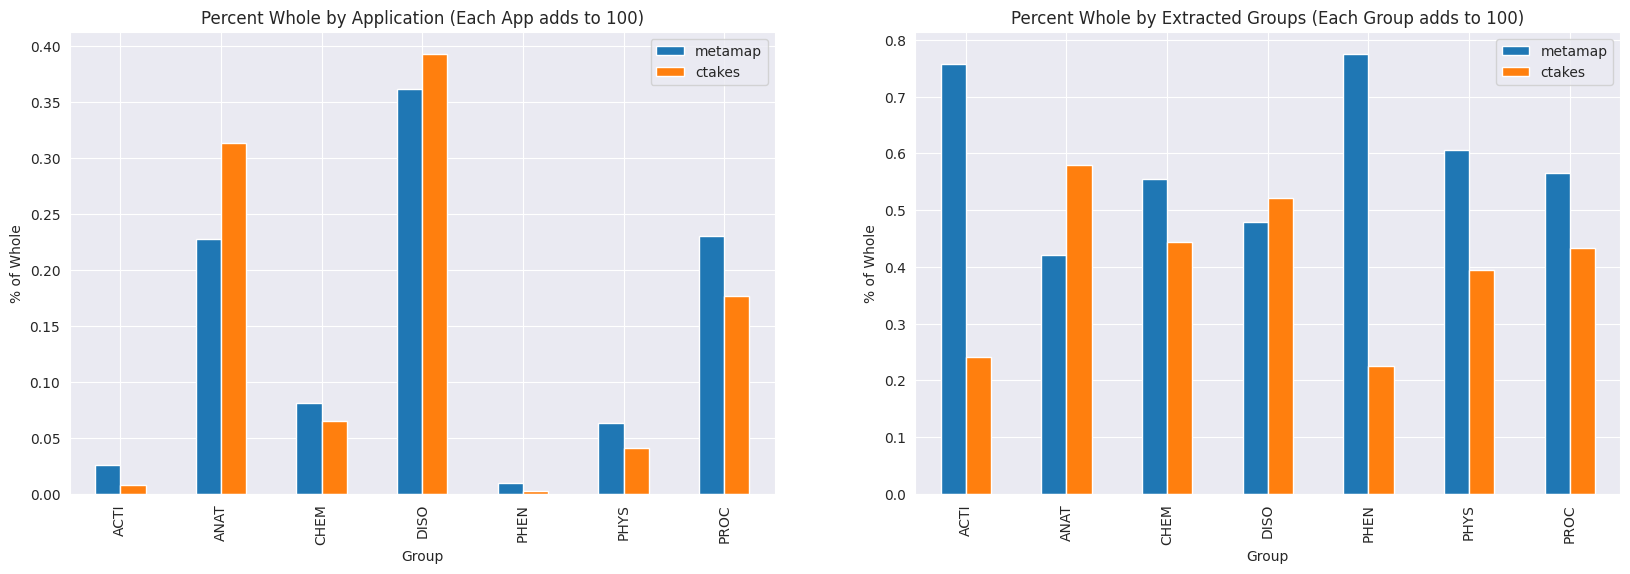

In [82]:
ctakes_tgroups = matches.tgroup_ctakes.value_counts().rename("ctakes").fillna(0) / matches.tgroup_ctakes.value_counts().sum()
metamap_tgroups = matches.loc[matches.tgroup_metamap.isin(ctakes_tgroups.index), "tgroup_metamap"].value_counts().rename("metamap").fillna(0) / matches.loc[matches.tgroup_metamap.isin(ctakes_tgroups.index), "tgroup_metamap"].value_counts().sum()

groups = ctakes_tgroups.to_frame().join(metamap_tgroups).sort_index()[["metamap", "ctakes"]]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

groups.plot.bar(
    title="Percent Whole by Application (Each App adds to 100)",
    ylabel="% of Whole",
    xlabel="Group",
    ax=ax[0]
)

(groups.metamap/(groups.metamap + groups.ctakes)).rename("metamap").to_frame().join((groups.ctakes/(groups.metamap + groups.ctakes)).rename("ctakes")).plot.bar(
    title="Percent Whole by Extracted Groups (Each Group adds to 100)",
    ylabel="% of Whole",
    xlabel="Group",
    ax=ax[1]
)

plt.show()

<Axes: xlabel='tgroup_ctakes'>

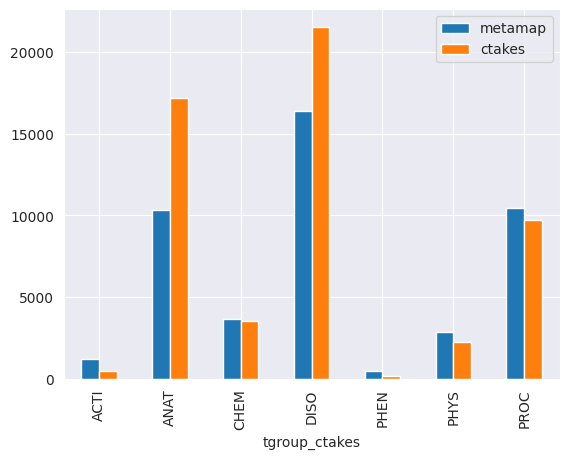

In [83]:
ctakes_tgroups = matches.tgroup_ctakes.value_counts().rename("ctakes").fillna(0)
metamap_tgroups = matches.loc[matches.tgroup_metamap.isin(ctakes_tgroups.index), "tgroup_metamap"].value_counts().rename("metamap").fillna(0)

groups = ctakes_tgroups.to_frame().join(metamap_tgroups).sort_index()[["metamap", "ctakes"]]
groups.plot.bar()

<Axes: xlabel='tgroup_metamap'>

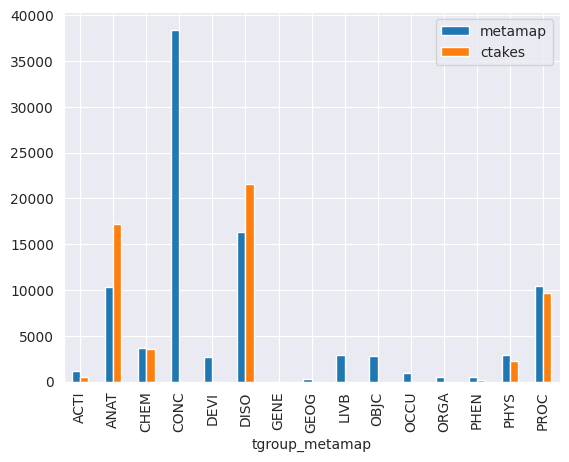

In [84]:
ctakes_tgroups = matches.tgroup_ctakes.value_counts().rename("ctakes").fillna(0)
metamap_tgroups = matches.tgroup_metamap.value_counts().rename("metamap").fillna(0)

groups = metamap_tgroups.to_frame().join(ctakes_tgroups).sort_index()[["metamap", "ctakes"]]
groups.plot.bar()

## Overlaps

In [85]:
import sqlite3
def insert_positions(df, table, cxn, n=1000):

    cols = df.columns
    sql = "INSERT INTO %s (%s) VALUES (%s);" % (table, ", ".join(cols), ", ".join(["?"] * len(cols)))

    values = df.values.tolist()
    for i in range(0, len(values), n):
        curr = cxn.cursor()
        curr.executemany(sql, values[i:i+n])
        curr.close()
        cxn.commit()
        yield (i,i+n)

In [86]:
cxn = sqlite3.connect("/home/xc383@drexel.edu/text2graph/postitions.db")

In [87]:
itm = insert_positions(smpos, "metamap", cxn, 10000)
for i in itm:
    pass
itc = insert_positions(scpos, "ctakes", cxn, 10000)
for i in itc:
    pass

IntegrityError: UNIQUE constraint failed: metamap.id

CREATE TABLE metamap (
	id varchar(255) primary key,
	norm_file varchar(255) not null,
	cui varchar(55) not null,
	tgroup varchar(4) not null,
	tui varchar(4) not null,
	start int not null,
	end int not null
);

CREATE TABLE ctakes (
	id varchar(255) primary key,
	norm_file varchar(255) not null,
	cui varchar(55) not null,
	tgroup varchar(4) not null,
	tui varchar(4) not null,
	start int not null,
	end int not null
);

CREATE TABLE overlaps AS
SELECT
        m.norm_file,
        m.id AS m_id,
        m.cui AS m_cui,
        m.tgroup AS m_tgroup,
        m.tui AS m_tui,
        m.start AS m_start,
        m.end AS m_end,
        c.id AS c_id,
        c.cui AS c_cui,
        c.tgroup AS c_tgroup,
        c.tui AS c_tui,
        c.start AS c_start,
        c.end AS c_end
    FROM
        metamap m
    JOIN
        ctakes c ON m.norm_file = c.norm_file
    WHERE
        m.start <= c.end AND m.end >= c.start
        AND m.norm_file = c.norm_file;

In [88]:
query = """
    SELECT
        m.norm_file,
        m.id AS m_id,
        m.cui AS m_cui,
        m.tgroup AS m_tgroup,
        m.tui AS m_tui,
        m.start AS m_start,
        m.end AS m_end,
        c.id AS c_id,
        c.cui AS c_cui,
        c.tgroup AS c_tgroup,
        c.tui AS c_tui,
        c.start AS c_start,
        c.end AS c_end
    FROM
        metamap m
    JOIN
        ctakes c ON m.norm_file = c.norm_file
    WHERE
        m.start <= c.end AND m.end >= c.start
        AND m.norm_file = c.norm_file;
"""

In [89]:
overlaps = cxn.execute(query)

In [90]:
cols = [x[0] for x in overlaps.description]
ovrlps = pd.DataFrame(overlaps.fetchall(), columns=cols)

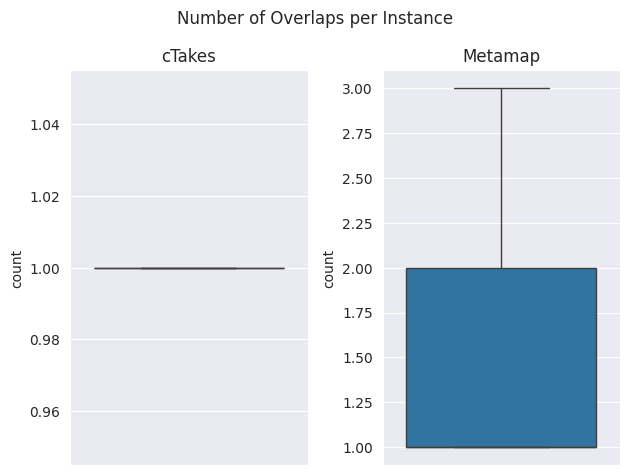

In [91]:
fig, ax = plt.subplots(1, 2)
sns.boxplot(ovrlps.value_counts("c_id"), showfliers=False, ax=ax[0])
ax[0].set_title("cTakes")
sns.boxplot(ovrlps.value_counts("m_id"), showfliers=False, ax=ax[1])
ax[1].set_title("Metamap")

plt.suptitle("Number of Overlaps per Instance")
plt.tight_layout()

In [92]:
print(f"{sum(ovrlps.m_tgroup == ovrlps.c_tgroup) / len(ovrlps) * 100:.2f}% of overlapping spans have the same group.")
print(f"{sum(ovrlps.m_cui == ovrlps.c_cui) / len(ovrlps) * 100:.2f}% of overlapping spans have the same cui.")
print("Constrained to Common Groups:")
print(f"\t{sum(ovrlps.loc[ovrlps.m_tgroup.isin(scpos.tgroup.unique())].m_tgroup == ovrlps.loc[ovrlps.m_tgroup.isin(scpos.tgroup.unique())].c_tgroup) / len(ovrlps.loc[ovrlps.m_tgroup.isin(scpos.tgroup.unique())]) * 100:.2f}% of overlapping spans have the same group.")
print(f"\t{sum(ovrlps.loc[ovrlps.m_tgroup.isin(scpos.tgroup.unique())].m_cui == ovrlps.loc[ovrlps.m_tgroup.isin(scpos.tgroup.unique())].c_cui) / len(ovrlps.loc[ovrlps.m_tgroup.isin(scpos.tgroup.unique())]) * 100:.2f}% of overlapping spans have the same cui.")

67.96% of overlapping spans have the same group.
41.68% of overlapping spans have the same cui.
Constrained to Common Groups:
	79.07% of overlapping spans have the same group.
	48.49% of overlapping spans have the same cui.


In [102]:
c1 = pd.merge(ovrlps, scpos, left_on="c_id", right_on="id", how="inner")
round((len(c1.c_id.unique()) / len(scpos)) * 100, 2)

97.27

In [101]:
m1 = pd.merge(ovrlps, smpos, left_on="m_id", right_on="id", how="inner")
round((len(m1.m_id.unique()) / len(smpos)) * 100, 2)

42.32

In [104]:
m2 = pd.merge(ovrlps.loc[ovrlps.m_tgroup.isin(scpos.tgroup.unique())], smpos, left_on="m_id", right_on="id", how="inner")
round((len(m1.m_id.unique()) / len(smpos)) * 100, 2)

35.32